In [42]:
import numpy as np
import matplotlib.pyplot as plt  
from sympy import *


## Symbols and constants 

In [43]:
gm1,gds1,gmb1,r1 = symbols('g_{m1} g_{ds1} g_{mb1} r_{1}')
gm2,gds2,gmb2,r2,rds2 = symbols('g_{m2} g_{ds2} g_{mb2} r_{2} r_{ds_2}')
AvLinGoal = np.power( 10,14/20 )
Vtn  = 0.6
Kn   = 200e-6
Lmin = 350e-9
Vdd  = 2.5

av1 = (gm1+gmb1+gds1)/(gds1 + 1/(r1))


# Common Gate

### Common Gate Gain
$$A_v = \frac{v_o}{v_i}=\frac{g_m+g_{mb}+g_{ds}}{g_{ds}+1/r_1}$$

### Input Impedance

In [44]:
zin = 1/(gm1+gds1+gmb1-(gds1/av1))
print(latex(zin))



\frac{1}{- \frac{g_{ds1} \left(g_{ds1} + \frac{1}{r_{1}}\right)}{g_{ds1} + g_{m1} + g_{mb1}} + g_{ds1} + g_{m1} + g_{mb1}}


$$Z_{in}=\frac{1}{- \frac{g_{ds1} \left(g_{ds1} + \frac{1}{r_{1}}\right)}{g_{ds1} + g_{m1} + g_{mb1}} + g_{ds1} + g_{m1} + g_{mb1}}\approx\frac{1}{g_m+g_{mb}}$$

The input impedance should be $Z_{in} = 50 ~ \Omega$ 


With $g_{mb}\approx 0.2\cdot g_m$

In [45]:
eq_z1 = 1/(gm1*(1.2)) - 50
gm1 = solve(eq_z1,[gm1])[0]
print("gm = ",gm1)

gm =  0.0166666666666667


For the bias current 
$$g_m =\sqrt{2K_{n,p}\frac{W}{L}I_D}= \frac{2I_D}{V_{DSsat}}$$

Aiming for $V_{DSsat} = 100 ~\text{mV}$

In [46]:
Id1, vdsat1,W1,L1,Vgs1,r1 = symbols('I_{d1} V_{dsat1} W_1 L_1 V_{GS_1} R_1' )

eq_id1 = Eq(Id1,(Kn/2)*(W1/L1)*np.power(Vgs1-Vtn,2))

vdsat1 = 0.150

eq_gm1 = Eq(gm1, 2*Id1/vdsat1)

s = solve(eq_gm1,[Id1])
Id1 = s[0]
print("Id1: ",Id1*1e3,"mA")


Id1:  1.25000000000000 mA


Using $L_{min} = 350~\text{n}$ 
$$I_D=\frac{K_n}{2}\cdot\frac{W}{L}V_{DSsat}^2$$

In [47]:
Id1 = 1e-3
wl1 = Id1/( 0.5*Kn*(vdsat1**2) )
print("W: ",wl1*Lmin*1e6,"um")

W:  155.55555555555557 um


In [48]:
gds1 = 3.23e-04
gmb1 = 2.52e-03
av1 = (gm1+gmb1+gds1)/(gds1 + 1/(r1)) #Redefine in order to assume values

s = solve( av1-AvLinGoal,[r1] )
s
r1 = s[0]
print("R1 Value: ",r1)

R1 Value:  280.136349372232


# Common Source

Para $V_{DSsat} = 100~\text{mV}$

$$V_{DSsat} =V_{GS}-V_{Th}\Leftrightarrow V_{GS} = 0.7$$

$$A_v = −gm(rds//R_2)$$

$$gm = K_{n,p}\frac{W}{L}V_{DSsat}$$

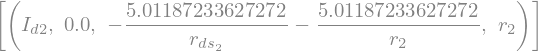

In [49]:
wl2,id2 = symbols("\\frac{W_2}{L_2} I_{d2}")
vdsat2 = 150e-3

eq_gm2 = Kn * (wl2/Lmin) * vdsat2
av2 = -gm2 * (1/(1/rds2  + 1/r2))
rds2 = 1/(9.60e-05) 
s = solve( [eq_gm2, av2-AvLinGoal],[id2,wl2,gm2,r2] )

s



# Output Buffer

In [50]:
Vin, Vip, Vgs1,gm1,gds1,Vsb1,gmb1,Vgs2,gm2,gds2,Vout, Vsb2 = symbols("V_{in} V_{ip} V_{gs1} g_{m1} g_{ds1} V_{sb1} g_{mb1} V_{gs2} g_{m2} g_{ds2} V_{out} V_{sb2} ")
init_printing()
Vgs1 = Vin-Vout
Vsb1 = Vout
Vgs2 = Vip
Vsb2 = 0

eq = -Vgs1*gm1 + Vout*gds1 + Vsb1*gmb1 +Vgs2*gm2+Vout*gds2-Vsb2*gmb2
pprint(eq)
eq = collect(eq,[Vin,Vip,Vout])
pprint(latex(eq))


V_{ip}⋅g_{m2} + V_{out}⋅g_{ds1} + V_{out}⋅g_{ds2} + V_{out}⋅g_{mb1} + g_{m1}⋅( ↪

↪ -V_{in} + V_{out})
V_{ip} g_{m2} + V_{out} \left(g_{ds1} + g_{ds2} + g_{mb1}\right) + g_{m1} \lef ↪

↪ t(- V_{in} + V_{out}\right)


$$V_{out}(g_{ds1}+g_{ds2}+g_{mb1}+g_{m1}) = V_{ip}\cdot g_{m2}-V_{in}\cdot g_{m1}$$

In [51]:
Id1, Id2, gm1,gm2,wl1 = symbols("I_{d1} I_{d2} g_{m1} g_{m2} \\frac{W}{L}_1")
Zout = 1/(gm1)

vdsat = 0.1

vgs = Vtn + vdsat

vbiasp = Vdd/2 + vgs
vbiasn = vgs

id_eq  = Eq( Id1,0.5*Kn*wl1*np.power(vdsat,2) )

eq_gm1 = Eq(gm1, 2*Id1/vdsat)
eq_gm2 = Eq(gm2, gm1)
eq_zo  = Eq(50,1/gm1)

s = solve([eq_gm1, eq_gm2, eq_zo,id_eq])
pprint(s)

print("Vbiasp = ",vbiasp )
print("Vbiasn = ",vbiasn )


{I_{d1}: 0.001, \frac{W}{L}₁: 1000.0, g_{m1}: 0.02, g_{m2}: 0.02}
Vbiasp =  1.95
Vbiasn =  0.7
